# Tarea 8

## Rosas Hernández Ariel Jesús

Ajustar el código en que se estima el retraso promedio de la línea de espera para que despliegue una gráfica de escalón de los eventos

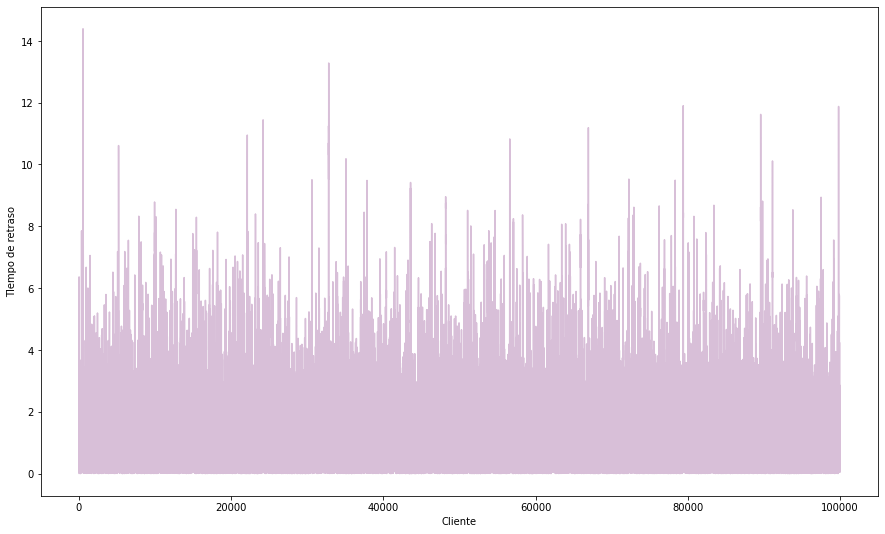

Retraso promedio =  1.4217


In [24]:
from random import expovariate
from statistics import mean 
from math import inf as Infinity
import matplotlib.pyplot as plt
# Parametros
lamda = 1.3                         # Razón de arrivos (1/Lambda)  Ojo
mu = 2.0                            # Razón de salida (1/Mu)       Ojo
#Num_Pkts = 100000                # Numero de paquetes a simular
T = 100000
count = 0                           # Contador de paquetes simulados
t = 0
N = 0                               # Variable de estado: numero de paquetes en el sistema
tll = expovariate(lamda)            # Tiempo de llegada
ts = Infinity                       # Tiempo de salida

# Variables de salida

tll_Data = []                       # Lista de tiempos de llegada
ts_Data = []                        # Lista de tiempos de salida
r_Data = []                         # Lista de retrasos individuales

#while count < Num_Pkts:
while t < T:
    if tll < ts:                           # Evento de llegada
        t = tll
        tll_Data.append(t)
        N = N + 1.0
        tll = t + expovariate(lamda) 
        if N == 1:
            ts = t + expovariate(mu)
    else:                                         # Evento de salida
        t = ts 
        ts_Data.append(t)
        N = N - 1.0
        count = count + 1                         # Paquetes simulados
        if N > 0:
            ts = t + expovariate(mu)
        else:
            ts = Infinity
            
# Estimación del retraso promedio:
usuario=0
lista_usuario=[]
#for i in range(Num_Pkts):
for i in range(T):
    d = ts_Data[i] - tll_Data[i]
    r_Data.append(d)
    usuario=usuario+1
    lista_usuario.append(usuario)
plt.figure (figsize= (15,9))
plt.plot(lista_usuario,r_Data,color="thistle")
plt.xlabel("Cliente")
plt.ylabel("TIempo de retraso")
plt.show()

print( "Retraso promedio = ", round( mean(r_Data), 4) )